This week:
Understand how this model works. Reread documentation.
Understand how important are the inputs for the final results
split into multiple parts:
1. input/settings/back-end worksheet
2. parameters: assumptions, /modules, put into github
    processing module

reason:
1. split tasks to different ppl
2. processing of big data, which ones take more time

how to scale down carbon budget from country level to real estate industry to property level

In [1]:
#import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import xlwings as xw
from pandas.api.types import is_numeric_dtype

# Part 1. Import raw data

In [2]:
#input total asset number here:
total_asset_num = 12
num = 12 + total_asset_num

In [3]:
#load worksheets
Input = xw.Book('input.xlsx').sheets['Input']
settings = xw.Book('input.xlsx').sheets['Settings']
asset = xw.Book('input.xlsx').sheets['Asset']
data = xw.Book('input.xlsx').sheets['Back-end']
zip_nuts = pd.read_excel(pd.ExcelFile('input.xlsx'), 'Back-end2')
zip_nuts.set_index('ZIP Code to NUTS mapping', inplace = True)
nuts_id = pd.read_excel(pd.ExcelFile('input.xlsx'), 'Back-end4')
nuts_id.set_index('NUTS_ID', inplace = True)
energy_price = xw.Book('input.xlsx').sheets['Energy Price']

In [4]:
#Input
input_C = pd.DataFrame(Input.range('C13:C'+str(num)).value) #asset number
input_C.fillna(0, inplace = True)
input_D = pd.DataFrame(Input.range('D13:D'+str(num)).value) #inlcusion
input_D.fillna(0, inplace = True)
input_E = pd.DataFrame(Input.range('E13:E'+str(num)).value) #asset name
input_E.fillna(0, inplace = True)
input_F = pd.DataFrame(Input.range('F13:F'+str(num)).value) #reporting year
input_F.fillna(0, inplace = True)
input_I = pd.DataFrame(Input.range('I13:I'+str(num)).value) #starting month
input_I.fillna(0, inplace = True)
input_J = pd.DataFrame(Input.range('J13:J'+str(num)).value) #montho of data
input_J.fillna(0, inplace = True)
input_M = pd.DataFrame(Input.range('M13:M'+str(num)).value) #country
input_M.fillna(0, inplace = True)
input_O = pd.DataFrame(Input.range('O13:O'+str(num)).value) #zip code
input_O.fillna(0, inplace = True)
input_Q = pd.DataFrame(Input.range('Q13:Q'+str(num)).value) #flooar area share
input_Q.fillna(0, inplace = True)
input_R = pd.DataFrame(Input.range('R13:R'+str(num)).value) #flooar area share
input_R.fillna(0, inplace = True)
input_S = pd.DataFrame(Input.range('S13:S'+str(num)).value) #flooar area share
input_S.fillna(0, inplace = True)
input_T = pd.DataFrame(Input.range('T13:T'+str(num)).value) #flooar area share
input_T.fillna(0, inplace = True)
input_U = pd.DataFrame(Input.range('U13:U'+str(num)).value) #flooar area share
input_U.fillna(0, inplace = True)
input_V = pd.DataFrame(Input.range('V13:V'+str(num)).value) #flooar area share
input_V.fillna(0, inplace = True)
input_W = pd.DataFrame(Input.range('W13:W'+str(num)).value) #flooar area share
input_W.fillna(0, inplace = True)
input_X = pd.DataFrame(Input.range('X13:X'+str(num)).value) #flooar area share
input_X.fillna(0, inplace = True)
input_Y = pd.DataFrame(Input.range('Y13:Y'+str(num)).value) #flooar area share
input_Y.fillna(0, inplace = True)
input_Z = pd.DataFrame(Input.range('Z13:Z'+str(num)).value) #floor area share (data centre)
input_Z.fillna(0, inplace = True)
input_R_Z = pd.DataFrame(Input.range('R13:Z'+str(num)).value) #mixed floor area share
input_R_Z.fillna(0, inplace = True)
input_AB = pd.DataFrame(Input.range('AB13:AB'+str(num)).value) #air conditioning
input_AB.fillna(0, inplace = True)
input_AC = pd.DataFrame(Input.range('AC13:AC'+str(num)).value) #floor area
input_AC.fillna(0, inplace = True)
input_AD = pd.DataFrame(Input.range('AD13:AD'+str(num)).value) #vacant area
input_AD.fillna(0, inplace = True)
input_AF = pd.DataFrame(Input.range('AF13:AF'+str(num)).value) #Electricity Usage
input_AF.fillna(0, inplace = True)
input_AG = pd.DataFrame(Input.range('AG13:AG'+str(num)).value) #Electricity data coverage
input_AG.fillna(0, inplace = True)
input_AI = pd.DataFrame(Input.range('AI13:AI'+str(num)).value) #Gas Usage
input_AI.fillna(0, inplace = True)
input_AL = pd.DataFrame(Input.range('AL13:AL'+str(num)).value)#Oil Usage
input_AL.fillna(0, inplace = True)
input_AO = pd.DataFrame(Input.range('AO13:AO'+str(num)).value) #District heating Usage
input_AO.fillna(0, inplace = True)
input_AS = pd.DataFrame(Input.range('AS13:AS'+str(num)).value) #District heating Usage
input_AS.fillna(0, inplace = True)
input_AW = pd.DataFrame(Input.range('AW13:AW'+str(num)).value) #Other energy type
input_AW.fillna(0, inplace = True)
input_AX = pd.DataFrame(Input.range('AX13:AX'+str(num)).value) #Other energy Usage
input_AX.fillna(0, inplace = True)
input_BA = pd.DataFrame(Input.range('BA13:BA'+str(num)).value) #Other energy type 2
input_BA.fillna(0, inplace = True)
input_BB = pd.DataFrame(Input.range('BB13:BB'+str(num)).value) #Other energy Usage 2
input_BB.fillna(0, inplace = True)
input_BF = pd.DataFrame(Input.range('BF13:BF'+str(num)).value) #Type of fugitive gas 
input_BF.fillna(0, inplace = True)
input_BG = pd.DataFrame(Input.range('BG13:BG'+str(num)).value) #Leak Amount 
input_BG.fillna(0, inplace = True)
input_BH = pd.DataFrame(Input.range('BH13:BH'+str(num)).value) #Type of fugitive gas 2
input_BH.fillna(0, inplace = True)
input_BI = pd.DataFrame(Input.range('BI13:BI'+str(num)).value) #Leak Amount 2
input_BI.fillna(0, inplace = True)
input_BK = pd.DataFrame(Input.range('BK13:BK'+str(num)).value) #Renewable energy generated on site (PV, wind)
input_BK.fillna(0, inplace = True)
input_BL = pd.DataFrame(Input.range('BL13:BL'+str(num)).value) #Renewable energy generated on site and exported(PV, wind)
input_BL.fillna(0, inplace = True)
input_BM = pd.DataFrame(Input.range('BM13:BM'+str(num)).value) #Renewable energy generated off-site and consumed on-site (Amount)
input_BM.fillna(0, inplace = True)
input_BN = pd.DataFrame(Input.range('BN13:BN'+str(num)).value) #Renewable energy generated off-site and consumed on-site (Reporting method)
input_BN.fillna(0, inplace = True)
input_BO = pd.DataFrame(Input.range('BO13:BO'+str(num)).value) #Renewable energy generated off-site and consumed on-site (Emission factor if market-based)
input_BO.fillna(0, inplace = True)
input_BQ = pd.DataFrame(Input.range('BQ13:BQ'+str(num)).value) #Renewable energy generated on site and exported(heat, solar)
input_BQ.fillna(0, inplace = True)
input_BS = pd.DataFrame(Input.range('BS13:BS'+str(num)).value) #Retrofit year
input_BS.fillna(0, inplace = True)
input_BT = pd.DataFrame(Input.range('BT13:BT'+str(num)).value) #Retrofit investment amount
input_BT.fillna(0, inplace = True)
input_BU = pd.DataFrame(Input.range('BU13:BU'+str(num)).value) #Retrofit achieved reduction of energy consumption [%]
input_BU.fillna(0, inplace = True)
input_BV = pd.DataFrame(Input.range('BV13:BV'+str(num)).value) #Retrofit embodied carbon related to retrofit action
input_BV.fillna(0, inplace = True)

#Maximum Coverage/ Data Coverage
#If input_D = Exclude then nan. If columns is 0 or nan, then 0
AWT = pd.DataFrame(Input.range('AR13:AR'+str(num)).value) / pd.DataFrame(Input.range('AQ13:AQ'+str(num)).value)
AWT.fillna(0, inplace = True)
AWQ = pd.DataFrame(Input.range('AH13:AH'+str(num)).value) / pd.DataFrame(Input.range('AG13:AG'+str(num)).value)
AWQ.fillna(0, inplace = True)
AWR = pd.DataFrame(Input.range('AK13:AK'+str(num)).value) / pd.DataFrame(Input.range('AJ13:AJ'+str(num)).value)
AWR.fillna(0, inplace = True)
AWS = pd.DataFrame(Input.range('AN13:AN'+str(num)).value) / pd.DataFrame(Input.range('AM13:AM'+str(num)).value)
AWS.fillna(0, inplace = True)
AWU = pd.DataFrame(Input.range('AV13:AV'+str(num)).value) / pd.DataFrame(Input.range('AU13:AU'+str(num)).value)
AWU.fillna(0, inplace = True)
AWV = pd.DataFrame(Input.range('AZ13:AZ'+str(num)).value) / pd.DataFrame(Input.range('AY13:AY'+str(num)).value)
AWV.fillna(0, inplace = True)
AWX = 12 / pd.DataFrame(Input.range('J13:J'+str(num)).value)
AWX.fillna(0, inplace = True)
AWY = pd.DataFrame(Input.range('AC13:AC'+str(num)).value) / (pd.DataFrame(Input.range('AC13:AC'+str(num)).value) - pd.DataFrame(Input.range('AD13:AD'+str(num)).value))
AWY.fillna(0, inplace = True)

In [5]:
#Settings
set_C = pd.DataFrame(settings.range('C13:C'+str(num)).value) #Use own assumptions or default settings
set_C.fillna(0, inplace = True)
set_E= pd.DataFrame(settings.range('E13:E'+str(num)).value) #Normalise heating and cooling consumption to weather in year of consumption [yes/no]
set_E.fillna(0, inplace = True)
set_F = pd.DataFrame(settings.range('F13:F'+str(num)).value) #Climate change projection (affects future heating and cooling demand)
set_F.fillna(0, inplace = True)
set_G = pd.DataFrame(settings.range('G13:G'+str(num)).value) #Apply default or user-defined emission factor for electricity consumption
set_G.fillna(0, inplace = True)
set_H = pd.DataFrame(settings.range('H13:H'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_H.fillna(0, inplace = True)
set_I = pd.DataFrame(settings.range('I13:I'+str(num)).value) #Set 2018 emission factor [kgCO2/kWh]
set_I.fillna(0, inplace = True)
set_J = pd.DataFrame(settings.range('J13:J'+str(num)).value) #Set annual rate of change [%]
set_J.fillna(0, inplace = True)
set_L = pd.DataFrame(settings.range('L13:L'+str(num)).value) #Apply default or user-defined emission factor for electricity consumption
set_L.fillna(0, inplace = True)
set_M = pd.DataFrame(settings.range('M13:M'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_M.fillna(0, inplace = True)
set_N = pd.DataFrame(settings.range('N13:N'+str(num)).value) #District cooling: Apply default or user-defined emission factor for electricity consumption
set_N.fillna(0, inplace = True)
set_O = pd.DataFrame(settings.range('O13:O'+str(num)).value) #District cooling: set 2018 emission factor
set_O.fillna(0, inplace = True)
set_Q = pd.DataFrame(settings.range('Q13:Q'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_Q.fillna(0, inplace = True)
set_S = pd.DataFrame(settings.range('S13:S'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_S.fillna(0, inplace = True)
set_T = pd.DataFrame(settings.range('T13:T'+str(num)).value) #Set annual rate of change [%]
set_T.fillna(0, inplace = True)
set_V = pd.DataFrame(settings.range('V13:V'+str(num)).value) #Apply default or user-defined gas price
set_V.fillna(0, inplace = True)
set_W = pd.DataFrame(settings.range('W13:W'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_W.fillna(0, inplace = True)
set_X = pd.DataFrame(settings.range('X13:X'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_X.fillna(0, inplace = True)
set_Y = pd.DataFrame(settings.range('Y13:Y'+str(num)).value) #Set annual rate of change [%]
set_Y.fillna(0, inplace = True)
set_AA = pd.DataFrame(settings.range('AA13:AA'+str(num)).value) #Apply default or user-defined district heating price
set_AA.fillna(0, inplace = True)
set_AB = pd.DataFrame(settings.range('AB13:AB'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_AB.fillna(0, inplace = True)
set_AC = pd.DataFrame(settings.range('AC13:AC'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_AC.fillna(0, inplace = True)
set_AD = pd.DataFrame(settings.range('AD13:AD'+str(num)).value) #Set annual rate of change [%]
set_AD.fillna(0, inplace = True)
set_AF = pd.DataFrame(settings.range('AF13:AF'+str(num)).value) #Apply default or user-defined district cooling price
set_AF.fillna(0, inplace = True)
set_AG = pd.DataFrame(settings.range('AG13:AG'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_AG.fillna(0, inplace = True)
set_AH = pd.DataFrame(settings.range('Y13:Y'+str(num)).value) #Set annual rate of change [%]
set_AH.fillna(0, inplace = True)
set_AK = pd.DataFrame(settings.range('AK13:AK'+str(num)).value) #Apply default or user-defined price for 'Other source" #1
set_AK.fillna(0, inplace = True)
set_AL = pd.DataFrame(settings.range('AL13:AL'+str(num)).value) #Choose method for setting user-defined electricity emission factors
set_AL.fillna(0, inplace = True)
set_AM = pd.DataFrame(settings.range('AM13:AM'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_AM.fillna(0, inplace = True)
set_AP = pd.DataFrame(settings.range('AP13:AP'+str(num)).value) #Set 2018 electricity price [€/kWh]
set_AP.fillna(0, inplace = True)
set_AV = pd.DataFrame(settings.range('AV13:AV'+str(num)).value) #Apply default or user-defined carbon pricing
set_AV.fillna(0, inplace = True)
set_AW = pd.DataFrame(settings.range('AW13:AW'+str(num)).value) #Choose method for setting user-defined carbon price
set_AW.fillna(0, inplace = True)
set_AX = pd.DataFrame(settings.range('AX13:AX'+str(num)).value) #Set 2018 carbon price [€/tCO2]
set_AX.fillna(0, inplace = True)
set_AY = pd.DataFrame(settings.range('AY13:AY'+str(num)).value) #Set annual rate of change [%]
set_AY.fillna(0, inplace = True)
set_AZ = pd.DataFrame(settings.range('AZ13:AZ'+str(num)).value) #Set 2018 carbon price [€/tCO2]
set_AZ.fillna(0, inplace = True)
set_BF = pd.DataFrame(settings.range('BF13:BF'+str(num)).value) #Default or user defined rate for valuing future spendings and savings
set_BF.fillna(0, inplace = True)
set_BG = pd.DataFrame(settings.range('BG13:BG'+str(num)).value) #Discount rate for valuing future spendings and savings (default: 3%)
set_BG.fillna(0, inplace = True)
set_BI = pd.DataFrame(settings.range('BI13:BI'+str(num)).value) #User defined electricity emission factors 
set_BI.fillna(0, inplace = True)
set_BI_CO = pd.DataFrame(settings.range('BI13:CO'+str(num)).value) #User defined electricity emission factors 
set_BI_CO.fillna(0, inplace = True)
set_CB = pd.DataFrame(settings.range('CB13:CB'+str(num)).value) #Set annual rate of change [%]
set_CB.fillna(0, inplace = True)
set_CQ = pd.DataFrame(settings.range('CQ13:DW'+str(num)).value) #District cooling: set 2018 emission factor
set_CQ.fillna(0, inplace = True)
set_FG = pd.DataFrame(settings.range('FG13:GM'+str(num)).value) #Set annual rate of change [%]
set_FG.fillna(0, inplace = True)
set_GO = pd.DataFrame(settings.range('GO13:HU'+str(num)).value) #Set annual rate of change [%]
set_GO.fillna(0, inplace = True)
set_HW = pd.DataFrame(settings.range('HW13:JC'+str(num)).value) #User-defined prices of 'Other source' of energy #1 set manually for each year 
set_HW.fillna(0, inplace = True)

In [7]:
#Raw data - all names go according to new Input.xlsx location
A1 = pd.DataFrame(data.range('A1:B29').value) #NUTS0 - AR
A1.set_index(0, inplace = True)

A32 = pd.DataFrame(data.range('A32:AK60').value) #Emissions factor: electricity & heat (trade adjusted) - A23
A32.columns = A32.iloc[0]
A32 = A32[1:]
A32.set_index('Country', inplace = True)

A109 = pd.DataFrame(data.range('A110:D719').value) #Normalisation
A109.set_index(0, inplace = True)

E10 = pd.DataFrame(data.range('E10:G17').value) #Emission factor: other energy sources -H127
E10.set_index(0, inplace = True)

C1 = pd.DataFrame(data.range('C1:D10').value) #property type acronym 
C1.set_index(0, inplace = True)

C18 = pd.DataFrame(data.range('C18:D29').value) #month number
C18.set_index(0, inplace = True)

C63 = pd.DataFrame(data.range('C63:D106').value) #Global Warming Potential of Cooling Gases
C63.set_index(0, inplace = True)

Target = pd.read_excel(pd.ExcelFile('input.xlsx'), 'GHG Target') #GHG decarbonisation target - AXG
Target.set_index('ta', inplace = True)

Target_energy = pd.read_excel(pd.ExcelFile('input.xlsx'), 'Energy Target')
Target_energy.set_index('ta', inplace = True)

G4 = data.range('G4').value #GHG conversion factor: Gas
G5 = data.range('G5').value #Oil
G6 = data.range('G6').value #Heat/Steam - J123

N1 = pd.DataFrame(data.range('N2:Q30').value) #Share of electricity/fossil fuel used for…
N1.set_index(0, inplace = True)

J3 = pd.DataFrame(data.range('J3:J14').value) #Share of heating per month

K3 = pd.DataFrame(data.range('K3:K14').value) #Share of cooling per month

T14 = pd.DataFrame(data.range('T14:T22').value) #CTX: North Antlantic

T2 = pd.DataFrame(data.range('T2:T13').value)

U14 = pd.DataFrame(data.range('U14:U22').value) #CTY: Continental

U2 = pd.DataFrame(data.range('U2:U13').value) 

V2 = pd.DataFrame(data.range('V2:V13').value) #CUN: Mediterranean

X2 = pd.DataFrame(data.range('X2:Y20').value) #BPN: property factor
X2.set_index(0, inplace = True)
X2.fillna(0, inplace = True)

Z4 = data.range('Z4').value

Z6 = data.range('Z6').value

AB3 = data.range('AB3').value #Margianl abatement cost

AB4 = data.range('AB4').value #Margianl abatement cost

AF2 = pd.DataFrame(data.range('AF2:AG29').value)
AF2.set_index(0, inplace = True)

#energy costs
years = list(range(2018,2051))
AVH34 = pd.DataFrame(energy_price.range('A34:AH61').value) #electricity price incl. VAT
AVH34.set_index(0, inplace = True)
AVH34.columns = years

AVH97 = pd.DataFrame(energy_price.range('A97:AH124').value) #gas price incl. VAT
AVH97.set_index(0, inplace = True)
AVH97.columns = years

AVH159 = pd.DataFrame(energy_price.range('A159:AH186').value) #oil price incl. VAT
AVH159.set_index(0, inplace = True)
AVH159.columns = years

AVH221 = pd.DataFrame(energy_price.range('A221:AH248').value) #wood chips price incl. VAT
AVH221.set_index(0, inplace = True)
AVH221.columns = years

AVH284 = pd.DataFrame(energy_price.range('A284:AH311').value) #wood pellets price incl. VAT
AVH284.set_index(0, inplace = True)
AVH284.columns = years

AVH346 = pd.DataFrame(energy_price.range('A346:AH373').value) #wood pellets price incl. VAT
AVH346.set_index(0, inplace = True)
AVH346.columns = years

AVH408 = pd.DataFrame(energy_price.range('A408:AH435').value) #coal price incl. VAT
AVH408.set_index(0, inplace = True)
AVH408.columns = years

AVH440 = pd.DataFrame(energy_price.range('A440:AH467').value) #carbon price incl. VAT
AVH440.set_index(0, inplace = True)
AVH440.columns = years

asset_CQ = pd.DataFrame(asset.range('A2:A13').value) #electricity price incl. VAT

## Check for inlclusion/completeness of data

In [8]:
#Check for inlclusion/completeness of data - BPQ
i = 0 #asset number
if not input_D.iloc[i][0] == 'Include':
    print('asset not included')
    if set_G.iloc[i][0] == 'User-defined' and ((set_H.iloc[i][0] == 'Set 2018 value and annual rate of change' and (set_I.iloc[i][0] == 0 or set_J.iloc[i][0] == 0)) or
    (set_H.iloc[i][0] == 'Set value for each year manually' and (set_BI_CO.iloc[i].any() == 0))): #BPS
        print('BPS = 0')
        if input_F.iloc[i][0]  == 0:
            print('input_F = 0')
            if input_I.iloc[i][0] == 0:
                print('input_I = 0')
                if input_J.iloc[i][0] == 0:
                    print('input_J = 0')
                    if input_M.iloc[i][0] == 0:
                        print('input_M = 0')
                        if input_Q.iloc[i][0] == 0:
                            print('input_Q = 0')
                            if input_Q.iloc[i][0] == 'Mixed Use' and input_Q.iloc[i][0] != 'Sum=100%':
                                pirnt('BPY = 0')
                                if input_AC.iloc[i][0] == 0:
                                    print('input_AC = 0')
                                    if input_AD.iloc[i][0] == 0:
                                        print('input_AD = 0')
                                        if input_AF.iloc[i][0] != 0 and is_numeric_dtype(input_AG.iloc[i][0]) == False: 
                                            print('input_AG is not numeric') 
                                            if input_AF.iloc[i][0] != 0 and is_numeric_dtype(input_AH.iloc[i][0]) == False: 
                                                print('input_AH is not numeric') 
                                                if input_AI.iloc[i][0] != 0 and is_numeric_dtype(input_AJ.iloc[i][0]) == False: 
                                                    print('input_AJ is not numeric') 
                                                    if input_AI.iloc[i][0] != 0 and is_numeric_dtype(input_AK.iloc[i][0]) == False: 
                                                        print('input_AK is not numeric') 
                                                        if input_AL.iloc[i][0] != 0 and is_numeric_dtype(input_AM.iloc[i][0]) == False: 
                                                            print('input_AM is not numeric') 
                                                            if input_AL.iloc[i][0] != 0 and is_numeric_dtype(input_AN.iloc[i][0]) == False: 
                                                                print('input_AN is not numeric') 
                                                                if input_AO.iloc[i][0] != 0 and is_numeric_dtype(input_AR.iloc[i][0]) == False: 
                                                                    print('input_AR is not numeric') 
                                                                    if input_AO.iloc[i][0] != 0 and is_numeric_dtype(input_AQ.iloc[i][0]) == False: 
                                                                        print('input_AQ is not numeric') 
                                                                        if input_AS.iloc[i][0] != 0 and is_numeric_dtype(input_AU.iloc[i][0]) == False: 
                                                                            print('input_AU is not numeric') 
                                                                            if input_AS.iloc[i][0] != 0 and is_numeric_dtype(input_AV.iloc[i][0]) == False: 
                                                                                print('input_AV is not numeric')
                                                                                if input_AX.iloc[i][0] != 0 and input_AW.iloc[i][0] == 0: 
                                                                                    print('input_AW is 0') 
                                                                                    if input_AX.iloc[i][0] != 0 and is_numeric_dtype(input_AY.iloc[i][0]) == False: 
                                                                                        print('input_AY is not numeric') 
                                                                                        if input_AX.iloc[i][0] != 0 and is_numeric_dtype(input_AZ.iloc[i][0]) == False: 
                                                                                            print('input_AZ is not numeric')
                                                                                            if input_BG.iloc[i][0] != 0 and input_BF.iloc[i][0] != 0:
                                                                                                print('input_BG and input_BF = 0')
                                                                                                if input_BI.iloc[i][0] != 0 and input_BH.iloc[i][0] != 0:
                                                                                                    print('input_BI and input_BH = 0')
                                                                                                    if input_BB.iloc[i][0] != 0 and input_BA.iloc[i][0] == 0: 
                                                                                                        print('input_BA is 0')
                                                                                                        if input_BB.iloc[i][0] != 0 and is_numeric_dtype(input_BC.iloc[i][0]) == False: 
                                                                                                            print('input_BC is not numeric')
                                                                                                            if input_BB.iloc[i][0] != 0 and is_numeric_dtype(input_BD.iloc[i][0]) == False: 
                                                                                                                print('input_BD is not numeric')
                                                                                                                BPQ = 0
else:
    BPQ = 1
print(BPQ)

1


# Part 2. Computataion and plotting

## Decarbonisation Target

In [29]:
def target_pathway(target_temp, country, property_type):
    asset_code = A1.loc[country].iloc[0] + '_' + C1.loc[property_type].iloc[0] + '_' + str(target_temp)
    target = Target.loc[asset_code]
    target_energy = Target_energy.loc[asset_code]

    #plot diagram
    fig, ax1 = plt.subplots(figsize = (20,10))
    ax1.plot(target, 'green', label = 'Decarbonisation pathway')
    a = ax1.set_xlabel('Year', fontsize = 15)
    ax1.set_ylabel('GHG intensity [kgCO2e/m²/a]', fontsize = 15)
    ax1.set_ylim(0, max(target)+5)
    ax1.grid(False)

    ax2 = ax1.twinx() 
    b = ax2.plot(target_energy, 'red', label = 'Energy intensity pathway')
    ax2.set_ylabel('Energy intensity [kWh/m²]', fontsize = 15)
    ax2.set_ylim(0, max(target_energy)+5)
    ax2.grid(False)

    ax2.plot(np.nan, 'green', label = 'Decarbonisation pathway')  #make an agent in ax2 to show legend of ax1
    ax2.legend(loc=0, fontsize = 12)

    plt.title('Decarbonisation and energy reduction pathway', fontsize = 25)
    plt.show()

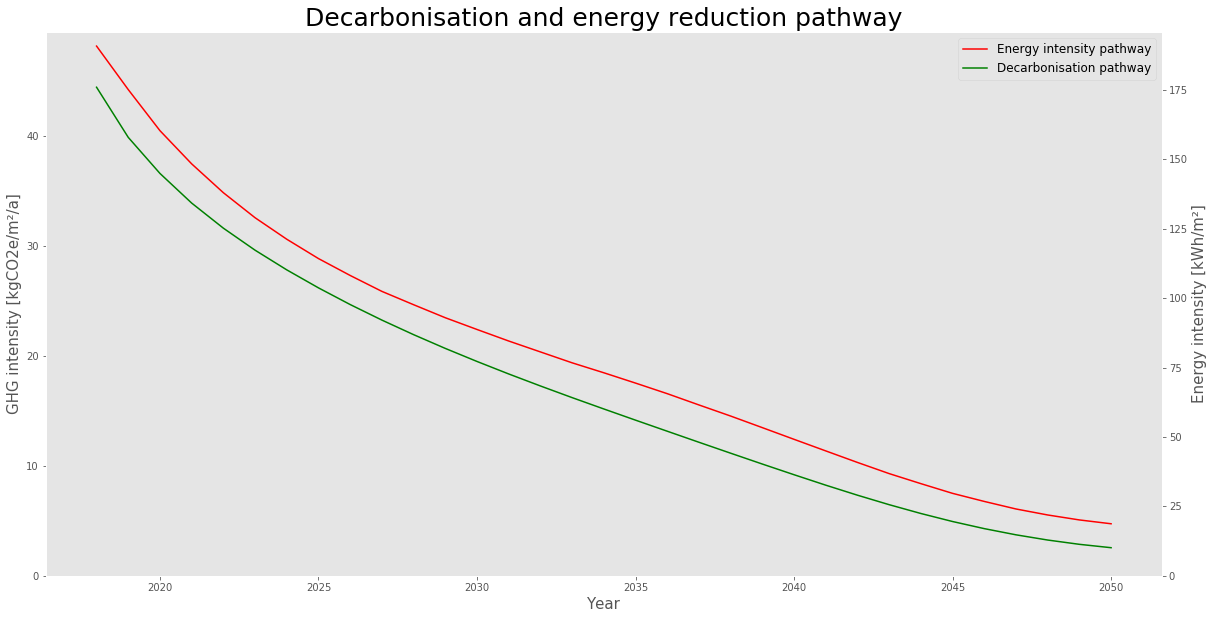

In [30]:
target_pathway(1.5, 'Austria', 'Office')

# I. Stranding diagram

Issues related to this diagram:
1. asset number 6 column JW wrong.
2. cannot plot difference between lines (plt.fillbetween) as before.

In [50]:
def stranding_diagram(asset_num, target_temp):

    if target_temp == 1.5:
        target = FP.iloc[asset_num-1,:]
    else:
        target = HA.iloc[asset_num-1,:]
        
    #import MA as emission metric
    Climate_grid = MA
    climate_grid = Climate_grid.iloc[asset_num-1,:]
    Baseline = [climate_grid.iloc[0]]*len(climate_grid) #create baseline pandas series with same index as climate_grid
    baseline = pd.Series(Baseline, index = climate_grid.index)   

    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(target, 'g', label = 'Decarbonisation target')
    plt.plot(climate_grid, 'k', label = 'Climate and grid corrected asset performance')
    plt.plot(baseline, ':k', label = 'Baseline asset performance')
    plt.plot(baseline.iloc[[0]],'kD', markersize = 10, label = '2018 performance') 
    
    #highlight stranding year
    stranding = target - climate_grid
    stranding_year = stranding[stranding < 0].index[0]
    plt.plot(climate_grid[[stranding_year]], 'ro', markersize = 20, label = 'Stranding')
    
    #Excess emissions
    #plt.fill_between(target.index, target, climate_grid, where = (target < climate_grid), color='C1', alpha=0.3, label = 'Excess emissions')
    plt.legend(loc = 'best', fontsize = 12)

    #set title and axis labels
    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Stranding Diagram(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('GHG intensity [kgCO2e/m²/a]', fontsize = 15)
    plt.show()

In [ ]:
answer: how many red dots will end up 2030

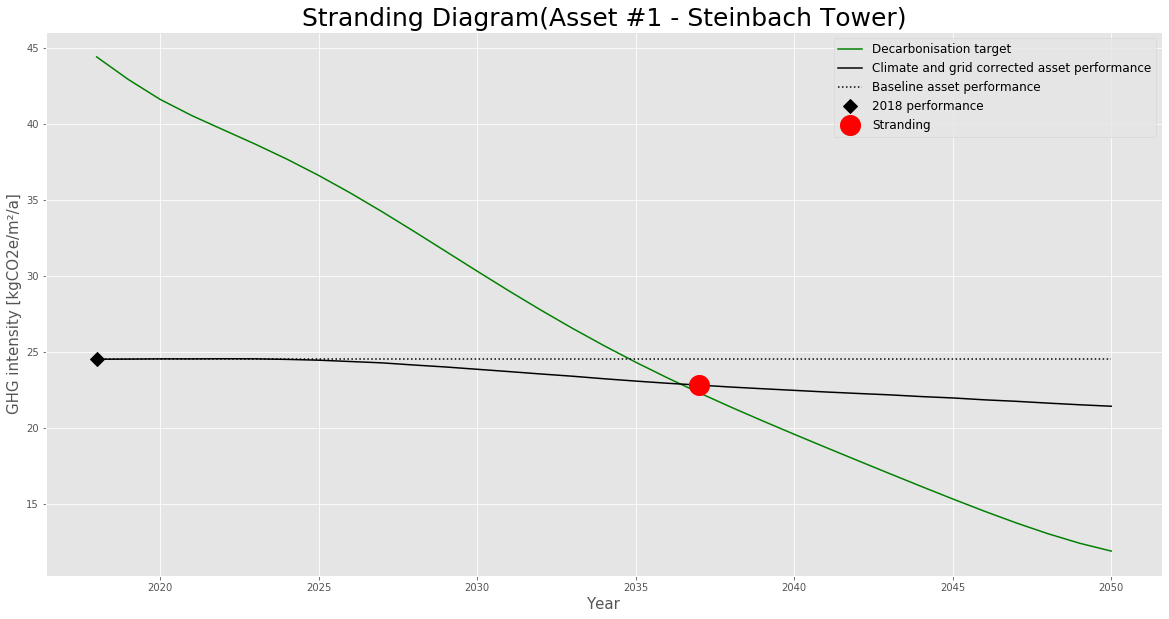

In [51]:
stranding_diagram(1, 2)

## i. FP(1.5), HA(2): Decarbonisation target 

In [45]:
years = list(range(2018,2051))

FP = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '1.5'
        FP_new = Target.loc[asset_code]
    else:
        FP_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' + property_type_code + '_' + '1.5'
            FP_new = Target.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + FP_new
    FP = pd.concat([FP, pd.DataFrame(FP_new).T])
    
HA = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '2'
        HA_new = Target.loc[asset_code]
    else:
        HA_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' +  property_type_code + '_' + '2'
            HA_new = Target.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + HA_new
        HA_new.name = country_code + '_' +  'MIX' + '_' + '2'
    HA = pd.concat([HA, pd.DataFrame(HA_new).T])

## ii. MA: GHG intensity = KP (GHG asolute) /AS(floor area)

In [48]:
#KP
years = list(range(2018,2051))
KP = pd.DataFrame(columns = years, index=list(range(total_asset_num)))

for i in range(total_asset_num):
    for year in years:
        if input_AB.iloc[i][0] != 'No':
            KP.iloc[i,year-2018] = ((KK.iloc[i]*(KB.iloc[i]*(((EE_FK.iloc[:,year-2018].iloc[i]/EE_FK.iloc[i][2018])*(input_AF.iloc[i]/CZZ_DBF.iloc[i][2018])
                +(1-input_AF.iloc[i]/CZZ_DBF.iloc[i][2018]))*(1+BMG_BMJ.loc[AR.iloc[i]][1][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1)+
                 BMG_BMJ.loc[AR.iloc[i]][2][0]*(CT_DZ.iloc[:,year-2018].iloc[i]-1))) + (KC.iloc[i]+KD.iloc[i]+KG.iloc[i])*
            (BI_CO.iloc[:,year-2018].iloc[i]/BI_CO.iloc[i][2018])*(1+BMG_BMJ.loc[AR.iloc[i]][3][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1))
            + KF.iloc[i]*(CT_DZ.iloc[:,year-2018].iloc[i]/CT_DZ.iloc[i][2018]) + KE.iloc[i]*BI_CO.iloc[:,year-2018].iloc[i]+KH.iloc[i])))[0]
        else:
             KP.iloc[i,year-2018] = ((KK.iloc[i]*(KB.iloc[i]*(((EE_FK.iloc[:,year-2018].iloc[i]/EE_FK.iloc[i][2018])*(input_AF.iloc[i]/CZZ_DBF.iloc[i][2018])
                +(1-input_AF.iloc[i]/CZZ_DBF.iloc[i][2018]))*(1+BMG_BMJ.loc[AR.iloc[i]][1][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1))) + (KC.iloc[i]+KD.iloc[i]+KG.iloc[i])*
            (BI_CO.iloc[:,year-2018].iloc[i]/BI_CO.iloc[i][2018])*(1+BMG_BMJ.loc[AR.iloc[i]][3][0]*(BI_CO.iloc[:,year-2018].iloc[i]-1))
            + KF.iloc[i]*(CT_DZ.iloc[:,year-2018].iloc[i]/CT_DZ.iloc[i][2018]) + KE.iloc[i]*BI_CO.iloc[:,year-2018].iloc[i]+KH.iloc[i])))[0]
                
#MA
AS = input_AC #floor area

years = list(range(2018,2051))
MA = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        MA.iloc[i][year] = (KP.iloc[i][year]/AS.iloc[i])[0]

## 1. KK

In [37]:
'''
a.KA: export emission 
'''
#AR, country acronym
AR = pd.DataFrame()
for i in range(total_asset_num):
    if not input_M.iloc[i][0] == 0:
        df_new = A1.loc[input_M.iloc[i]]
    else:
        df_new = pd.DataFrame(input_M.iloc[i])
    AR = pd.concat([AR, df_new])
if len(AR.columns)==2:
    AR = AR.drop(columns=0)

#slice A32 table for the reporting year
A32_year = pd.DataFrame()
for i in range(total_asset_num):
    df_new = A32.loc[AR.iloc[i]][input_F[0][i]]
    A32_year = pd.concat([A32_year, df_new])
    
#slice A32 for UK 2018
A32_UK_2018 = A32.loc['UK'][2018]

#slice A32 for 2018
A32_2018 = pd.DataFrame()
for i in range(total_asset_num):
    df_new = A32.loc[AR.iloc[i]][2018]

#KA - Export emission
KA = pd.DataFrame()
for i in range(total_asset_num):
    if set_L.iloc[i][0] == 'Default':
        df_new = -AWT.iloc[i]*input_BQ.iloc[i]*G6*A32_year.iloc[i]/A32_UK_2018
    else:
        df_new = -AWT.iloc[i]*input_BQ.iloc[i]*G6*set_M.iloc[i]

    if set_G.iloc[i][0] == 'Default':
        df_new = df_new-AWQ.iloc[i]*input_BL.iloc[i]*A32_year.iloc[i]
    elif set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
        df_new = df_new-AWQ.iloc[i]*input_BL.iloc[i]*set_I.iloc[i]
    else:
        df_new = df_new-AWQ.iloc[i]*input_BL.iloc[i]*set_BI.iloc[i]
    KA = pd.concat([KA, df_new])
    
 
'''
b. KB:KH: emission share
'''
#JT - JZ
#JT - Electricity emission
JT = pd.DataFrame()
for i in range(total_asset_num):
    if set_G.iloc[i][0] == 'Default':
        df_new = AWQ.iloc[i]*(input_AF.iloc[i]-input_BM.iloc[i])*A32_2018.iloc[i] 
    elif set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
        df_new = AWQ.iloc[i]*(input_AF.iloc[i]-input_BM.iloc[i])*set_I.iloc[i][0] + input_BM.iloc[i]
    else:
        df_new = AWQ.iloc[i]*(input_AF.iloc[i]-input_BM.iloc[i])*set_BI.iloc[i][0]
        
    if input_BN.iloc[i][0] == 'Location-based approach':
        if set_G.iloc[i][0] == 'Default':
            df_new = df_new+input_BM.iloc[i][0]*A32_year.iloc[i]
        elif set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
            df_new = df_new+input_BM.iloc[i][0]*set_I.iloc[i]
        else:
            df_new = df_new+input_BM.iloc[i][0]*set_BI.iloc[i]
    else:
        df_new = df_new+input_BM.iloc[i][0]*input_BO.iloc[i]
    JT = pd.concat([JT, df_new])

#JU - Gas emission
JU = pd.DataFrame()
for i in range(total_asset_num):
    df_new = AWR.iloc[i]*input_AI.iloc[i]*G4
    JU = pd.concat([JU, df_new])

#JV - Gas emission
#=IF(Input!$D13="Exclude","",AWS3*Input!AL13*'Back-end'!J$122)
JV = pd.DataFrame()
for i in range(total_asset_num):
    df_new = AWS.iloc[i]*input_AL.iloc[i]*G5
    JV = pd.concat([JV, df_new])

#JW - District heating emission
#=IF(Input!$D13="Exclude","",AWT3*Input!AO13*
#IF(Settings!L13="Default",'Back-end'!J$123*(VLOOKUP('Back-end'!AR3,'Back-end'!A$23:AK$51,5)/VLOOKUP("UK",'Back-end'!A$23:AK$51,5)),Settings!M13))
JW = pd.DataFrame()
for i in range(total_asset_num):
    if set_L.iloc[i][0] == 'Default':
        df_new = AWT.iloc[i]*input_AO.iloc[i]*G6*A32_2018.iloc[i]/A32_UK_2018
    else:
        df_new = AWT.iloc[i]*input_AO.iloc[i]*set_M.iloc[i]
    JW = pd.concat([JW, df_new])

#JX - District cooling emission
JX = pd.DataFrame()
for i in range(total_asset_num):
    if set_N.iloc[i][0] == 'Default':
        df_new = AWU.iloc[i]*input_AS.iloc[i]*G6*A32_2018.iloc[i]/A32_UK_2018
    else:
        df_new = AWU.iloc[i]*input_AS.iloc[i]*set_O.iloc[i]
    JX = pd.concat([JX, df_new])
    
#JY - Other emission
#other energy souce - conversion factor 
E10_AW = pd.DataFrame()
for i in range(total_asset_num):
    if input_AW.iloc[i][0] != 0:
        df_new = E10.loc[input_AW.iloc[i]][2]
    else:
        df_new = pd.DataFrame(input_AW.iloc[1])
    E10_AW = pd.concat([E10_AW, df_new])
E10_AW.fillna(0, inplace = True)
if len(E10_AW.columns)==2:
    E10_AW = E10_AW.drop(columns=1)

E10_BA = pd.DataFrame()
for i in range(total_asset_num):
    if input_BA.iloc[i][0] != 0:
        df_new = E10.loc[input_BA.iloc[i]][2]
    else:
        df_new = pd.DataFrame(input_BA.iloc[1])
    E10_BA = pd.concat([E10_BA, df_new])
E10_BA.fillna(0, inplace = True)
if len(E10_BA.columns)==2:
    E10_BA = E10_BA.drop(columns=1)
    
JY = pd.DataFrame()
for i in range(total_asset_num):
    if input_AW.iloc[i][0] == 0 or input_AX.iloc[i][0] == 0:
        df_new = AWU.iloc[i]*input_AX.iloc[i]*0
    else:
        df_new = AWU.iloc[i]*input_AX.iloc[i]*E10_AW.iloc[i]
    if input_BA.iloc[i][0] == 0 or input_BB.iloc[i][0] == 0:
        df_new = df_new + AWV.iloc[i]*input_BB.iloc[i]*0
    else:
        df_new = df_new + AWV.iloc[i]*input_BB.iloc[i]*E10_BA.iloc[i]
    JY = pd.concat([JY, df_new])
    
#JZ - Fugitive emission = AT + AU
#fugitive gas - global warming potential
C63_BF = pd.DataFrame()
for i in range(total_asset_num):
    if input_BF.iloc[i][0] != 0:
        df_new = C63.loc[input_BF.iloc[i]][1]
    else:
        df_new = pd.DataFrame(input_BF.iloc[1])
    C63_BF = pd.concat([C63_BF, df_new])
C63_BF.fillna(0, inplace = True)
if len(C63_BF.columns)==2:
    C63_BF = C63_BF.drop(columns=1)
    
C63_BH = pd.DataFrame()
for i in range(total_asset_num):
    if input_BH.iloc[i][0] != 0:
        df_new = C63.loc[input_BH.iloc[i]][1]
    else:
        df_new = pd.DataFrame(input_BH.iloc[1])
    C63_BH = pd.concat([C63_BH, df_new])
C63_BH.fillna(0, inplace = True)
if len(C63_BH.columns)==2:
    C63_BH = C63_BH.drop(columns=1)
    
#AT - Leak1
AT = pd.DataFrame()
for i in range(total_asset_num):
    if input_BF.iloc[i][0] != 0:
        df_new = C63_BF.iloc[i]*input_BG.iloc[i]
    else:
        df_new = input_BG.iloc[i]*0
    AT = pd.concat([AT, df_new])

#AU - Leak2
AU = pd.DataFrame()
for i in range(total_asset_num):
    if input_BH.iloc[i][0] != 0:
        df_new = C63_BH.iloc[i]*input_BI.iloc[i]
    else:
        df_new = input_BG.iloc[i]*0
    AU = pd.concat([AU, df_new])

JZ = pd.DataFrame()
for i in range(total_asset_num):
    df_new = AT.iloc[i] + AU.iloc[i]
    JZ = pd.concat([JZ, df_new])
        
    
#CTX - CUS
#CTZ: start
#month to month number
CTZ = pd.DataFrame()
#=IF(BPQ3=0,"",IF(Input!I13="",1,VLOOKUP(Input!I13,'Back-end'!$CTX$3:$CTY$14,2,FALSE)))
for i in range(total_asset_num):
    if input_I.iloc[i][0] != 0:
        df_new = C18.loc[input_I.iloc[i]][1]
    else:
        df_new = pd.DataFrame(C18.loc['January'])
    CTZ = pd.concat([CTZ, df_new])
CTZ.fillna(0, inplace = True)

#CUA: end
#=IF(BPQ3=0,"",CTZ3+Input!J13-1)
CUA = pd.DataFrame()
for i in range(total_asset_num):
    df_new = CTZ.iloc[i] + input_J.iloc[i] - 1
    CUA = pd.concat([CUA, df_new])

#CUB_CUM: Month included
months = list(range(1,13))
CUB_CUM = pd.DataFrame(columns=months, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for month in months:
        if (month >= CTZ.iloc[i][0] and month <= CUA.iloc[i][0]) or (month+12 >= CTZ.iloc[i][0] and month+12 <= CUA.iloc[i][0]):
            CUB_CUM.iloc[i, month-1] = 1
        else:
            CUB_CUM.iloc[i, month-1] = 0

#CTX/CTY/CUN
CTX29 = T14

CTX17 = T2

CTY29 = U14

CTY17 = U2

CUN17 = V2


#CUS: Electro_norm_12
CUS = pd.DataFrame()
for i in range(total_asset_num):
    CUB_CUM_i = pd.DataFrame(CUB_CUM.iloc[i]).reset_index().drop(['index'], axis = 1).rename(columns={i: 0})
    if (AR.iloc[i][1] == CTX29).any()[0]:
        CUS_new = 1/(CUB_CUM_i * CTX17).sum()
        
    elif (AR.iloc[i][1] == CTY29).any()[0]:
        CUS_new = 1/(CUB_CUM_i * CTY17).sum()
        
    else:
        CUS_new = 1/(CUB_CUM_i * CUN17).sum()
    CUS = pd.concat([CUS, CUS_new])

#CUO: Heat_norm_12
CUN3 = J3
CUO = pd.DataFrame()
for i in range(total_asset_num):
    CUB_CUM_i = pd.DataFrame(CUB_CUM.iloc[i]).reset_index().drop(['index'], axis = 1).rename(columns={i: 0})
    CUO_new = 1/(CUB_CUM_i * CUN3).sum()
    CUO = pd.concat([CUO, CUO_new])

#CUQ: Cool_norm_12
CUP3 = K3
CUQ = pd.DataFrame()
for i in range(total_asset_num):
    CUB_CUM_i = pd.DataFrame(CUB_CUM.iloc[i]).reset_index().drop(['index'], axis = 1).rename(columns={i: 0})
    CUQ_new = 1/(CUB_CUM_i * CUP3).sum()
    CUQ = pd.concat([CUQ, CUQ_new]) 
    

    
#KJ: AS.LENG_norm 
KJ = pd.DataFrame()
for i in range(total_asset_num):
    KJ_new = JT.iloc[i]*CUS.iloc[i]+(JU.iloc[i]+JV.iloc[i]+JW.iloc[i]+JY.iloc[i])*CUO.iloc[i]+JX.iloc[i]*CUQ.iloc[i]+JZ.iloc[i]*AWX.iloc[i]+AWX.iloc[i]*KA.iloc[i]
    KJ = pd.concat([KJ, KJ_new]) 
    
# KB: Electricity emission share
KB = JT/(JT+JU+JV+JW+JX+JY+JZ)

# KC: Gas emission share
KC = JU/(JT+JU+JV+JW+JX+JY+JZ)

# KD: Oil emission share
KD = JV/(JT+JU+JV+JW+JX+JY+JZ)

# KE: Gas emission share
KE = JW/(JT+JU+JV+JW+JX+JY+JZ)

# KF: Gas emission share
KF = JX/(JT+JU+JV+JW+JX+JY+JZ)

# KG: Gas emission share
KG = JY/(JT+JU+JV+JW+JX+JY+JZ)

# KH: Gas emission share
KH = JZ/(JT+JU+JV+JW+JX+JY+JZ)

'''
c.BMG_BMJ: Share of electricity/fossil fuel used for heating/cooling
'''
BMG_BMJ = N1

'''
d. BI_CO - HDD index and CT_DZ - CDD index
'''
#AP: NUTS3
AP = pd.DataFrame()
for i in range(total_asset_num):
    if input_M.iloc[i][0] != 0:
        zip_new = AR.iloc[i][1] + str(input_O.iloc[i][0])
        AP_new = zip_nuts.loc[zip_new]
    else:
        AP_new = pd.DataFrame(input_M.iloc[i])
    AP = pd.concat([AP, AP_new]) 
    
#AV: ZIP check
#=IF(Input!M14="","",AP4<>"")
AV = pd.DataFrame()
for i in range(total_asset_num):
    if input_M.iloc[i][0] != 0:
        AV_new = (AP.iloc[i] != 0)
    else:
        AP_new = pd.DataFrame(input_M.iloc[i])
    AV = pd.concat([AV, AV_new]) 
    
#BI_CO - HDD index
years = list(range(3,36))
BI_CO = pd.DataFrame(columns = years, index=list(range(total_asset_num)))

for i in range(total_asset_num):
    for year in years:
        if set_F.iloc[i][0] == 'RCP4.5':
            if AV.iloc[i][0] != None:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['HDD_45_pa'])/(nuts_id.loc[AP.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['HDD_45_pa']))[0]
            else:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['HDD_45_pa'])/(nuts_id.loc[AR.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['HDD_45_pa']))[0]
        else:
            if AV.iloc[i][0] != None:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['HDD_85_pa'])/(nuts_id.loc[AP.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['HDD_85_pa']))[0]
            else:
                BI_CO.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['HDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['HDD_85_pa'])/(nuts_id.loc[AR.iloc[i]]['HDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['HDD_85_pa']))[0]
                
#CT_DZ - CDD index
years = list(range(3,36))
CT_DZ = pd.DataFrame(columns = years, index=list(range(total_asset_num)))

for i in range(total_asset_num):
    for year in years:
        if set_F.iloc[i][0] == 'RCP4.5':
            if AV.iloc[i][0] != None:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['CDD_45_pa'])/(nuts_id.loc[AP.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['CDD_45_pa']))[0]
            else:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['CDD_45_pa'])/(nuts_id.loc[AR.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['CDD_45_pa']))[0]
        else:
            if AV.iloc[i][0] != None:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AP.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AP.iloc[i]]['CDD_85_pa'])/(nuts_id.loc[AP.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AP.iloc[i]]['CDD_85_pa']))[0]
            else:
                CT_DZ.iloc[i,year-3] = ((nuts_id.loc[AR.iloc[i]]['CDD_2015'] + year*nuts_id.loc[AR.iloc[i]]['CDD_85_pa'])/(nuts_id.loc[AR.iloc[i]]['CDD_2015'] + 3*nuts_id.loc[AR.iloc[i]]['CDD_85_pa']))[0]

CT_DZ.columns = list(range(2018,2051))
BI_CO.columns = list(range(2018,2051))


'''
e. AWZ/AXA: weather normalisation: heat/cool
'''
AXC279_AXE = A109.iloc[277:554,:]
AXC279_AXE.set_index(1, inplace = True)
AXC279_AXD = AXC279_AXE.iloc[:,:-1]
AXC584_AXE = A109.iloc[582:610,:]
AXC584_AXE.set_index(1, inplace = True)
AXC584_AXD = AXC584_AXE.iloc[:,:-1]

AWZ = pd.DataFrame()
for i in range(total_asset_num):
    if set_C.iloc[i][0] == 'Default values' or set_E.iloc[i][0] == 'Yes':
        if AV.iloc[i][0] != None:
            try:
                AWZ_new = AXC279_AXD.loc[AP.iloc[i][0][:4]]/AXC279_AXE.loc[AP.iloc[i][0][:4]][3]
                
            except KeyError:
                AWZ_new = AXC584_AXD.loc[AP.iloc[i][0][:2]]/AXC584_AXE.loc[AP.iloc[i][0][:2]][3]
        else:
            AWZ_new = pd.DataFrame({'0': [1]})
    else:
        AWZ_new = pd.DataFrame({'0': [1]})
    AWZ = pd.concat([AWZ, AWZ_new])
    
AXC2_AXE = A109.iloc[0:277,:]
AXC2_AXE.set_index(1, inplace = True)
AXC2_AXD = AXC2_AXE.iloc[:,:-1]
AXC556_AXE = A109.iloc[554:582,:]
AXC556_AXE.set_index(1, inplace = True)
AXC556_AXD = AXC556_AXE.iloc[:,:-1]

AXA = pd.DataFrame()
for i in range(total_asset_num):
    if set_C.iloc[i][0] == 'Default values' or set_E.iloc[i][0] == 'Yes':
        if AV.iloc[i][0] != None:
            try:
                AXA_new = AXC2_AXD.loc[AP.iloc[i][0][:4]]/AXC2_AXE.loc[AP.iloc[i][0][:4]][3]
                
            except KeyError:
                AXA_new = AXC556_AXD.loc[AP.iloc[i][0][:2]]/AXC556_AXE.loc[AP.iloc[i][0][:2]][3]
        else:
            AXA_new = pd.DataFrame({'0': [1]})
    else:
        AXA_new = pd.DataFrame({'0': [1]})
    AXA = pd.concat([AXA, AXA_new])
    
'''
KK: BSR_OC_norm
'''
KK = pd.DataFrame()
for i in range(total_asset_num):
    KK_new = -KA.iloc[i]+(KJ.iloc[i]+KA.iloc[i])*(AWY.iloc[i]*KB.iloc[i]*(1+(BMG_BMJ.loc[AR.iloc[i]][1][0])*(BI_CO.iloc[:,0].iloc[i]*AWZ.iloc[i]-1) 
            + BMG_BMJ.loc[AR.iloc[i]][2][0]*(CT_DZ.iloc[:,0].iloc[i]*AXA.iloc[i]-1)) + (KC.iloc[i]+KD.iloc[i]+KE.iloc[i])
            * (1+(BMG_BMJ.loc[AR.iloc[i]][3][0]*(BI_CO.iloc[:,0].iloc[i]*AWZ.iloc[i]-1)))*AWZ.iloc[i]+KF.iloc[i]*AXA.iloc[i])
    KK = pd.concat([KK, KK_new]) 

## 2. EE:FK

In [43]:
#EE:FK - grid index
years = list(range(2018,2051))
EE_FK = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_G.iloc[i][0] == 'Default':
            EE_FK.iloc[i,year-2018] = (A32.loc[AR.iloc[i]][year]/A32.loc[AR.iloc[i]][2018])[0]
        elif set_H.iloc[i][0] == 'DSet 2018 value and annual rate of change':
            EE_FK.iloc[i,year-2018] = ((set_J.iloc[i] + 1)**(year-2018))[0]
        else:
            EE_FK.iloc[i,year-2018] = (set_BJ.iloc[i]/set_BI.iloc[i])[0]

## 3. CZZ_DBF

In [44]:
# CZZ_DBF: Electricity procurement
years = list(range(2018,2051))
CZZ_DBF = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    CZZ_DBF.iloc[i,0] = (AWQ.iloc[i]*input_AF.iloc[i]*AWY.iloc[i]*((1+(BMG_BMJ.loc[AR.iloc[i]][1][0]*
                                (BI_CO.iloc[:,0].iloc[i]*AWZ.iloc[i]-1))+
                                (BMG_BMJ.loc[AR.iloc[i]][2][0]*(CT_DZ.iloc[:,0].iloc[i]*AXA.iloc[i]-1))))*CUS.iloc[i])[0]
for i in range(total_asset_num):
    for year in years[1:]:
        CZZ_DBF.iloc[i,year-2018] = ((CZZ_DBF.iloc[i,0]+input_BK.iloc[i])*((1+(BMG_BMJ.loc[AR.iloc[i]][1][0]*
                                (BI_CO.iloc[:,year-2018].iloc[i]-1))+
                                (BMG_BMJ.loc[AR.iloc[i]][1][0]*(CT_DZ.iloc[:,year-2018].iloc[i]-1))))-input_BK.iloc[i])[0]


# II. Energy reduction pathway

Issues: 1. BAB/BBL error: used one year ahead data to calculate mixed use building

In [63]:
def energy_reduction_pathway(asset_num, target_temp):

    if target_temp == 1.5:
        target = BAB.iloc[asset_num-1,:]
    elif target_temp == 2:
        target = BBL.iloc[asset_num-1,:]
    energy_intensity = E58.iloc[asset_num-1,:]
    
    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(target, 'g', label = 'Country & property type specific target')
    plt.plot(energy_intensity, 'k', label = 'Asset energy_intensity')
    plt.legend(fontsize = 12)

    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Energy Reduction Pathway(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Energy intensity [kWh/m²/yr]', fontsize = 15)
    plt.show()

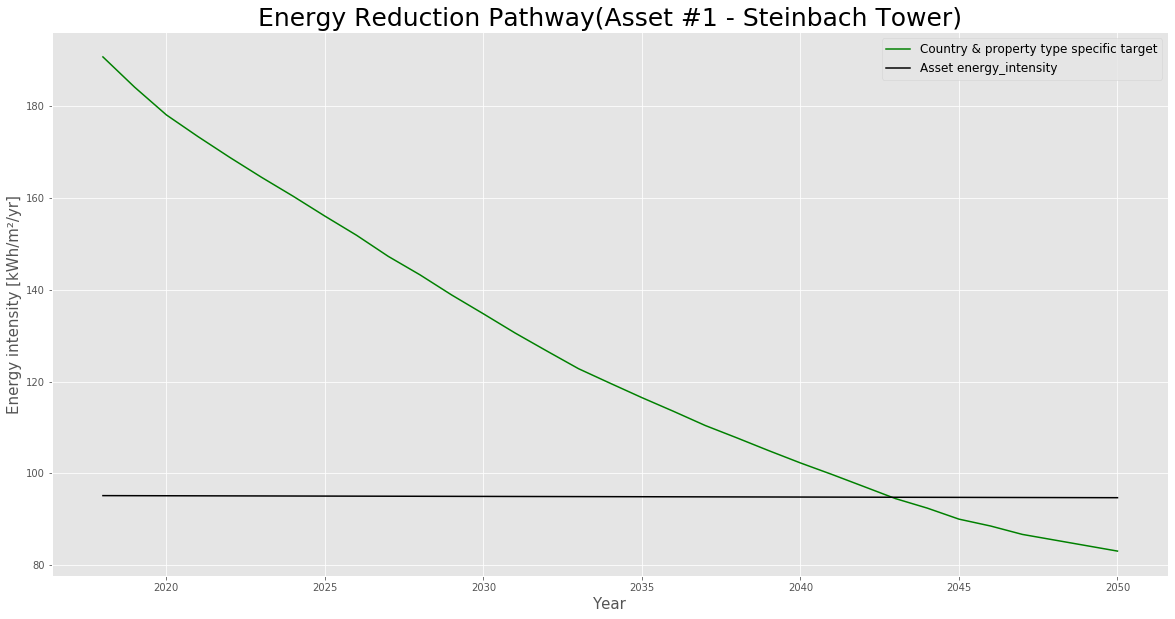

In [64]:
energy_reduction_pathway(1, 2)

## i. BAB(1.5), BBL(2): Energy Target

In [61]:
years = list(range(2018,2051))
BAB = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '1.5'
        BAB_new = Target_energy.loc[asset_code]
    else:
        BAB_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' + property_type_code + '_' + '1.5'
            BAB_new = Target_energy.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + BAB_new
        BAB_new.name = country_code + '_' +  'MIX' + '_' + '2'
    BAB = pd.concat([BAB, pd.DataFrame(BAB_new).T])
    
BBL = pd.DataFrame()
for asset_num in range(1,total_asset_num+1):
    if input_Q.iloc[asset_num-1,:][0] != 'Mixed Use':
        country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
        property_type_code = C1.loc[''.join(map(str, input_Q.iloc[asset_num-1,:].tolist())),1]
        asset_code = country_code + '_' + property_type_code + '_' + '2'
        BBL_new = Target_energy.loc[asset_code]
    else:
        BBL_new = 0
        for i in range(len(C1)-1):
            country_code = A1.loc[''.join(map(str, input_M.iloc[asset_num-1,:].tolist())),1]
            property_type_code = ''.join(map(str, C1.iloc[i]))
            asset_code = country_code + '_' +  property_type_code + '_' + '2'
            BBL_new = Target_energy.loc[asset_code]*input_R_Z.iloc[asset_num-1][i] + BBL_new
        BBL_new.name = country_code + '_' +  'MIX' + '_' + '2'
    BBL = pd.concat([BBL, pd.DataFrame(BBL_new).T])

## ii. E58: Total Energy

In [118]:
#BEF: net electricity
BEF = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        BEF.iloc[i,year-2018] = (CZZ_DBF.iloc[i][year] - input_BL.iloc[i]*AWX.iloc[i])[0]

#BFO:net fuel
BFO = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        BFO.iloc[i,year-2018] = ((1+(BMG_BMJ.loc[AR.iloc[i]][3][0])*(BI_CO.iloc[i][year]*AWZ.iloc[i]-1))*
                                 (input_AI.iloc[i]*AWR.iloc[i]+input_AL.iloc[i]*AWS.iloc[i]+(input_BB.iloc[i]+
                                    input_AX.iloc[i])*AWV.iloc[i]*BI_CO.iloc[i][year]))[0]
    
#BGX: net DH&C
BGX = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if input_AO.iloc[i][0] == 0:
            BGX.iloc[i,year-2018] = 0
            if input_AS.iloc[i][0] != 0:
                BGX.iloc[i,year-2018] = (input_AS.iloc[i]*CT_DZ.iloc[i][year]*AWU.iloc[i]*AXA.iloc[i])[0]
        else:
            BGX.iloc[i,year-2018] = (input_AO.iloc[i]*BI_CO.iloc[i][year]*AWT.iloc[i]*AWZ.iloc[i])[0]
            if input_AS.iloc[i][0] != 0:
                BGX.iloc[i,year-2018] = (BGX.iloc[i,year-2018] + input_AS.iloc[i]*CT_DZ.iloc[i][year]*AWU.iloc[i]*AXA.iloc[i])[0]

#BIG: net energy consumption
BIG = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        BIG.iloc[i,year-2018] = (BEF.iloc[i][year]+BFO.iloc[i][year]+BGX.iloc[i][year]-input_BQ.iloc[i]*AWX.iloc[i])[0]
        
#E58: Total Energy 
E58 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        E58.iloc[i,year-2018] = BIG.iloc[i][year]/AS.iloc[i][0]
        if input_F.iloc[i][0] > 2018:
            for na_year in range(2018,int(input_F.iloc[i][0])):
                E58.iloc[i,na_year-2018] = None

# VII.  Cost of retrofitting to comply with decarbonisation pathway:

issues: Excel error fixed: formula is wrong in that it reflected all mixed use as containing data centers

In [74]:
def retrofit_costs(asset_num):

    costs1 = BQX.iloc[asset_num-1,:]
    costs2 = BSH.iloc[asset_num-1,:]
    
    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(costs1, 'blue', label = '1.5°C target')
    plt.plot(costs2, 'orange', label = '2°C target')
    plt.legend(fontsize = 12)

    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Costs of Retrofitting to Comply with Decarbonisation Pathway(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Retrofit Costs [€]', fontsize = 15)
    plt.show()

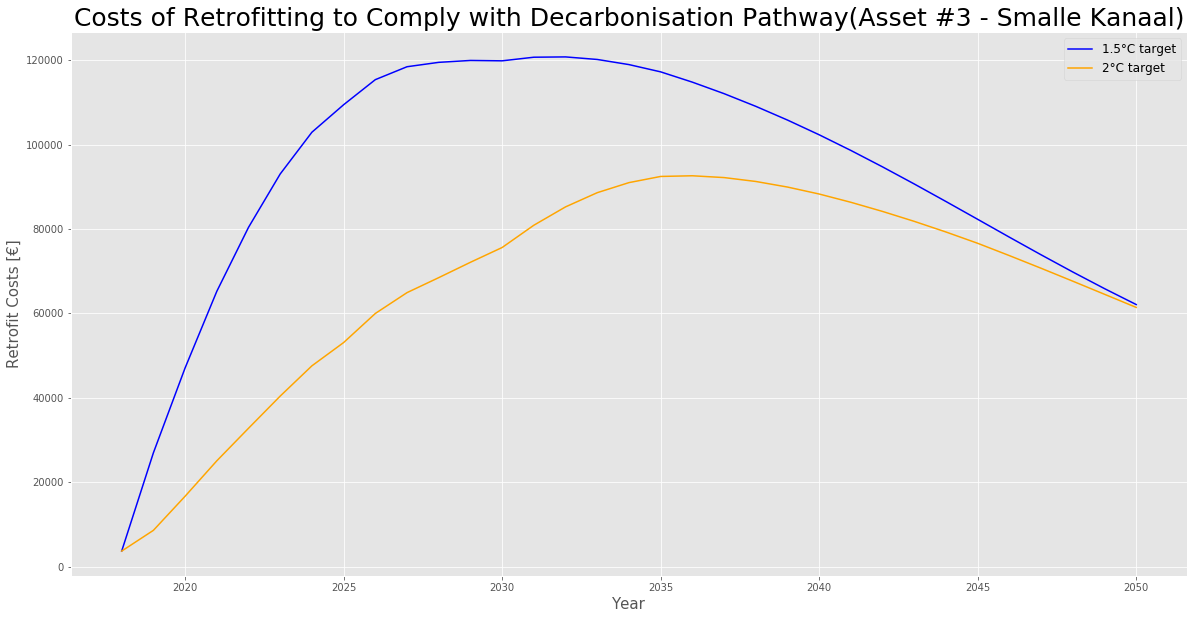

In [75]:
retrofit_costs(3)

## i. BSH: Retrofit costs 2, 1.5

In [121]:
#OW(2)/NL(1.5)
years = list(range(2018,2051))
OW = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if MA.iloc[i][year] > HA.iloc[i][year]:
            OW.iloc[i,year-2018] = 1
        else:
            OW.iloc[i,year-2018] = 0
            
NL = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if MA.iloc[i][year] > FP.iloc[i][year]:
            NL.iloc[i,year-2018] = 1
        else:
            NL.iloc[i,year-2018] = 0
            
#CSK: data center or not
#=IF(OR(Input!Q13="Data centers",Input!Q13="Mixed Use"),1,IF(AND(Input!Q13="Mixed Use",Input!Z13>0),1,0))

CSK = pd.DataFrame(columns = ['CSK'], index=list(range(total_asset_num)))

for i in range(total_asset_num):
    if input_Q.iloc[i][0] == 'Data Centers':
        CSK.iloc[i,0] = 1
    elif input_Q.iloc[i][0] == 'Mixed Use' and input_Z.iloc[i][0] > 0:
        CSK.iloc[i,0] = 1
    else:
        CSK.iloc[i,0] = 0

#BWK: marginal abatement cost
BWK3 = AB3

BWK4 = AB4

#BWI: Property Type Factor
BWI = pd.DataFrame(columns = ['BWI'], index=list(range(total_asset_num)))

for i in range(total_asset_num):
    if input_Q.iloc[i][0] != 'Mixed Use':
        BWI.iloc[i,0] = X2.loc[C1.loc[input_Q.iloc[i]][1][0]][1]
    else:
        BWI.iloc[i,0] = (input_R.iloc[i]*X2[1][i] + input_S.iloc[i]*X2[1][i+1] + input_T.iloc[i]*X2[1][i+2] + input_U.iloc[i]*X2[1][i+3] + input_V.iloc[i]*X2[1][i+4] + input_W.iloc[i]*X2[1][i+5] + input_X.iloc[i]*X2[1][i+6] + input_Y.iloc[i]*X2[1][i+7])[0]
        
#BPK: Country/AC.CY.Factor
BPK = AF2

#AAY: Target emission 2
#=IF($BPQ3=0,"",HA3*$AS3)
years = list(range(2018,2051))
AAY = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        AAY.iloc[i,year-2018] = (HA.iloc[i][year]*AS.iloc[i])[0]

ZN = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        ZN.iloc[i,year-2018] = (FP.iloc[i][year]*AS.iloc[i])[0]
        
        
#BSH: Retrofit costs 2
years = list(range(2018,2051))
BSH = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if OW.iloc[i][year] == 0:
            BSH.iloc[i,year-2018] = 0
        else:
            if CSK.iloc[i][0] == 1:
                BSH.iloc[i,year-2018] = None
            else: 
                BSH.iloc[i,year-2018] = AS.iloc[i][0]*BWK3/BWK4*BWI.iloc[i][0]*(AF2.loc[AR.iloc[i]].iloc[0][1])*(math.exp(BWK4*BIG.iloc[i][year]/AS.iloc[i])
                -math.exp(BWK4*AAY.iloc[i][year]/KP.iloc[i][year]*BIG.iloc[i][year]/AS.iloc[i][0]))*(1-(Z4*(1-AAY.iloc[i][year]/(MA.iloc[i][year]*AS.iloc[i][0]))**2
                +Z6*(1-AAY.iloc[i][year]/KP.iloc[i][year])+Z6))**(year-2015)
                
#BQX: Retrofit costs 1.5
BQX = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if NL.iloc[i][year] == 0:
            BQX.iloc[i,year-2018] = 0
        else:
            if CSK.iloc[i][0] == 1:
                BQX.iloc[i,year-2018] = None
            else: 
                BQX.iloc[i,year-2018] = AS.iloc[i][0]*BWK3/BWK4*BWI.iloc[i][0]*(AF2.loc[AR.iloc[i]].iloc[0][1])*(math.exp(BWK4*BIG.iloc[i][year]/AS.iloc[i])
                -math.exp(BWK4*ZN.iloc[i][year]/KP.iloc[i][year]*BIG.iloc[i][year]/AS.iloc[i][0]))*(1-(Z4*(1-ZN.iloc[i][year]/(MA.iloc[i][year]*AS.iloc[i][0]))**2
                +Z6*(1-ZN.iloc[i][year]/KP.iloc[i][year])+Z6))**(year-2015)               

# VIII. Emission budget depletion and ecological payback of retrofit measures 

In [92]:
def retrofit_measures(asset_num):
    
    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(sum_ZN.iloc[asset_num-1], 'b', label = '1.5°C target')
    plt.plot(sum_AAY.iloc[asset_num-1], 'orange', label = '2°C target')
    plt.plot(wo_rf.iloc[asset_num-1], 'r', label = 'Cumulative emission wo retrofit')
    plt.plot(w_rf.iloc[asset_num-1], 'g', label = 'Cumulative emission w retrofit')
    plt.legend(fontsize = 12)

    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Emission Budget Depletion and Ecological Payback of Retrofit Measures(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Emissions [kgCO2]', fontsize = 15)
    plt.show()

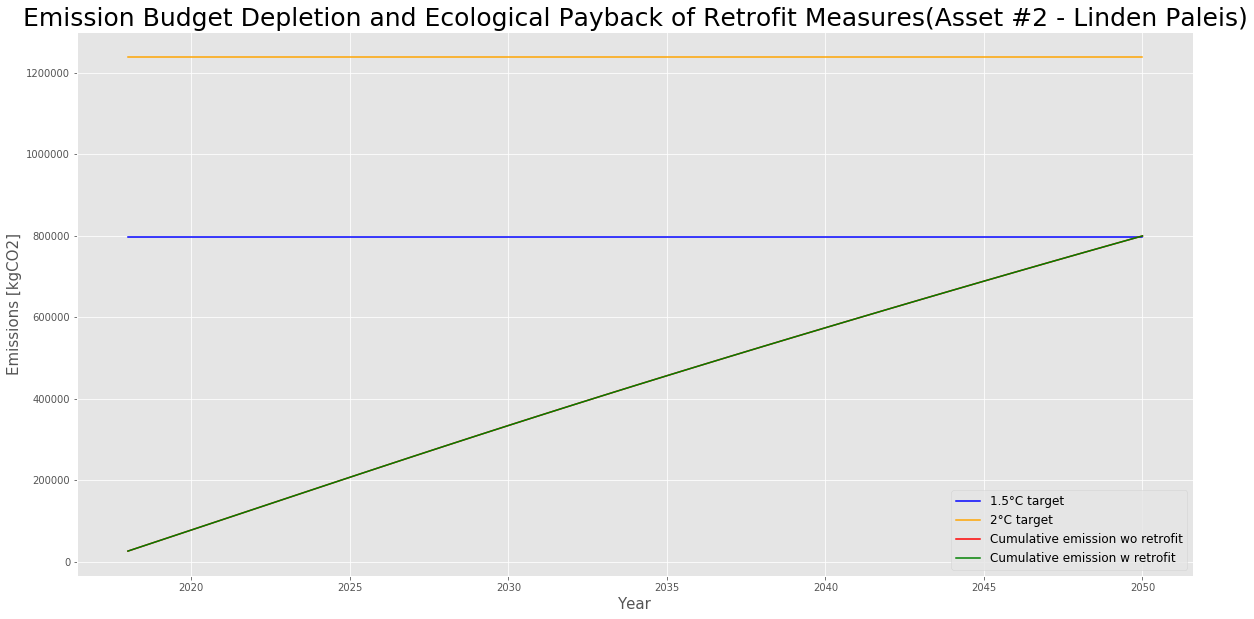

In [93]:
retrofit_measures(2)

## i. Sum of target emission 1.5/2

In [91]:
years = list(range(2018,2051))
sum_ZN = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    sum_ZN.iloc[i] = ZN.iloc[i].sum()

sum_AAY = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    sum_AAY.iloc[i] = AAY.iloc[i].sum()

## ii. Cumulative emission wo RF

In [90]:
#cumulative KP
wo_rf = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if year == 2018:
            wo_rf.iloc[i][year] = KP.iloc[i][2018]
        else:
            wo_rf.iloc[i][year] = wo_rf.iloc[i][year-1] + KP.iloc[i][year]

## iii. Cumulative emission w RF

In [86]:
#CPV: energy RF1
CPV = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if input_BS.iloc[i][0] == 0 and input_BT.iloc[i][0] == 0:
            CPV.iloc[i,year-2018] = BIG.iloc[i][year]/AS.iloc[i][0]
        else:
            if CSK.iloc[i][0] == 1:
                CPV.iloc[i,year-2018] = 0
            else:
                if input_BS.iloc[i][0] > year:
                    CPV.iloc[i,year-2018] = BIG.iloc[i][year]/AS.iloc[i][0]
                else:
                    if input_BS.iloc[i][0] != year:
                        CPV.iloc[i,year-2018] = BIG.iloc[i][year]/BIG.iloc[i][input_BS.iloc[i][0]]*CPT.iloc[i][0]
                    else: 
                        if CPT.iloc[i][0] == 'Net-zero':
                            CPV.iloc[i,year-2018] = 0
                        else:
                            CPV.iloc[i,year-2018] = CPT.iloc[i][0]
                            
# CPT3: RF1 post
CPT = pd.DataFrame(columns = ['CPT'], index=list(range(total_asset_num)))
for i in range(total_asset_num):
    if input_BT.iloc[i][0] == 0:
        CPT.iloc[i] = 0
    else:
        if input_BU.iloc[i][0] != 0:
            CPT.iloc[i] = BIG.iloc[i][2018]/AS.iloc[i][0]*(1-input_BU.iloc[i][0])
        else:
            if not np.where(BWM.iloc[i] == 2)[0].tolist(): 
                CPT.iloc[i] = 'Net-zero'
            else:
                CPT.iloc[i] = 501 - (np.where(BWM.iloc[i] == 2)[0][0]) - 1   

# BWM3:CPS3: Target.RF1
rf = list(range(0,501))

BWM = pd.DataFrame(columns = rf, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for j in rf: 
        if CSK.iloc[i][0] == 1:
            BWM.iloc[i,j] = 0
        else: 
            if input_BT.iloc[i][0] == 0:
                BWM.iloc[i,j] = 0
            else:
                if BIG.iloc[i][input_BS.iloc[i][0]]/AS.iloc[i][0] < j:
                    BWM.iloc[i,j] = 0
                else:
                    if input_BT.iloc[i][0] > AS.iloc[i][0]*BWK3/BWK4*BWI.iloc[i][0]*(AF2.loc[AR.iloc[i]].iloc[0][1])*(math.exp(BWK4*BIG.iloc[i][input_BS.iloc[i][0]]/AS.iloc[i])-math.exp(BWK4*j))*(1-(Z4*(1-j/BIG.iloc[i][input_BS.iloc[i][0]])**2+Z6*(1-j/BIG.iloc[i][input_BS.iloc[i][0]])+Z6))**(input_BS.iloc[i][0]-2015):
                        BWM.iloc[i,j] = 1
                    else:
                        BWM.iloc[i,j] = 2
BWM = BWM.iloc[:, ::-1]                


#CRC: Carbon RF1
CRC = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        CRC.iloc[i,year-2018] = CPV.iloc[i][year]*KP.iloc[i][year]/BIG.iloc[i][year]
        
#A223: Cumulative savings
A223 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if -(CRC.iloc[i][year]*AS.iloc[i][0]-KP.iloc[i][year]) < 1:
            A223.iloc[i,year-2018] = 0
        else:
            A223.iloc[i,year-2018] = -(CRC.iloc[i][year]*AS.iloc[i][0]-KP.iloc[i][year]) + A223.iloc[i,year-2019]

#A224: Embodied carbon      
A224 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years[1:]:
        if year == input_BS.iloc[i][0]:
            A224.iloc[i][year] = input_BV.iloc[i][0]
        else:
            A224.iloc[i][year] = A224.iloc[i][year-1] 
A224.fillna(0, inplace = True)

#Cumulated emission w RF  = KP + A223 -A224
w_rf = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        w_rf.iloc[i][year] = wo_rf.iloc[i][year] - A223.iloc[i][year] + A224.iloc[i][year]            

# IX. Emission budget depletion and ecological payback of retrofit measures 

issues: asset_CR: Error? why is formula different between asset 1 and all other assets? 

In [122]:
def economic_payback(asset_num):
    
    savings = CYK.iloc[i]
    years = list(range(2018,2051))
    
    #investment only starts from year of retrofit
    investment = pd.Series(input_BT.iloc[asset_num-1][0], index = years)
    investment[input_BS.iloc[asset_num-1][0] > investment.index] = 0
    
    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(investment, 'blue', label = 'investment')
    plt.plot(savings, 'orange', label = 'savings')
    plt.legend(fontsize = 12)

    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Costs of Retrofitting to Comply with Decarbonisation Pathway(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Retrofit Costs [€]', fontsize = 15)
    plt.show()

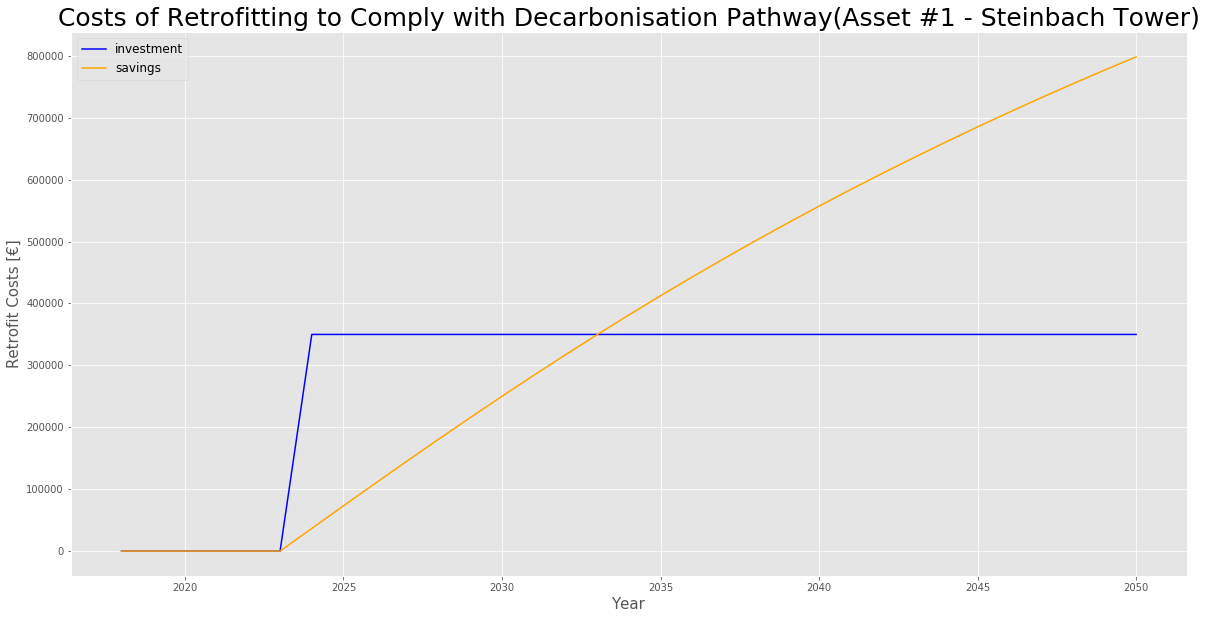

In [123]:
economic_payback(1)

## i. CYK: Cumulative discounted energy savings from retrofit 1

In [95]:
#asset_CR: electricity costs
asset_CR = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if input_AF.iloc[i][0] == 0:
            asset_CR.iloc[i][year] = 0
        else:
            if set_Q.iloc[i][0] == 'Default':
                if asset_CQ.iloc[i][0] == 'Consider procured electricity only':
                    asset_CR.iloc[i][year] = AVH34.loc[AR.iloc[i]][year][0]*CZZ_DBF.iloc[i][year]
                else:
                    asset_CR.iloc[i][year] = AVH34.loc[AR.iloc[i]][year][0]*BEF.iloc[i][year]
            else:
                if set_R.iloc[i][0] == 'Set 2018 value and annual rate of change':
                    if asset_CQ.iloc[i][0] == 'Consider procured electricity only':
                        asset_CR.iloc[i][year] =  set_S.iloc[i][0]*((set_T.iloc[i][0]+1)**i)*CZZ_DBF.iloc[i][year]
                    else:
                        asset_CR.iloc[i][year] =  set_S.iloc[i][0]*((set_T.iloc[i][0]+1)**i)*BEF.iloc[i][year]
                else:
                    if asset_CQ.iloc[i][0] == 'Consider procured electricity only':
                        asset_CR.iloc[i][year] = set_CQ.iloc[i][year-2018]*CZZ_DBF.iloc[i][year]
                    else:
                        asset_CR.iloc[i][year] = set_CQ.iloc[i][year-2018]*BEF.iloc[i][year]
asset_CR.fillna(0,inplace = True)

#asset_EA: fuel costs
asset_EA1 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if input_AI.iloc[i][0] == 0:
             asset_EA1.iloc[i][year] = 0
        else:
            if set_V.iloc[i][0] == 'Default':
                step1 = AVH97.loc[AR.iloc[i]][year][0]
            else:
                if set_W.iloc[i][0] == 'Set 2018 value and annual rate of change':
                    step1 = set_X.iloc[i][0]*(set_Y.iloc[i][o]+1)**i
                else:
                    step1 = set_CB.iloc[i][0]
            asset_EA1.iloc[i][year] = AWZ.iloc[i][0]*step1*input_AI.iloc[i][0]*AWR.iloc[i][0]+AVH159.loc[AR.iloc[i]][year][0]*input_AL.iloc[i][0]*AWS.iloc[i][0]
    
asset_EA2 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_AK.iloc[i][0] != 'Default':
            if set_AL.iloc[i][0] == 'Set 2018 value and annual rate of change':
                asset_EA2.iloc[i][year] = set_AM.iloc[i][0]*((set_AN.iloc[i][0]+1)**i)*input_AX.iloc[i][0]*AWV.iloc[i][0]
            else: 
                asset_EA2.iloc[i][year] = set_HW.iloc[i][year-2018]*input_AX.iloc[i][0]*AWV.iloc[i][0]
        else:
            if input_AW.iloc[i][0] == 'Biogas' or input_AW.iloc[i][0] == 'Landfill gas' or input_AW.iloc[i][0] == 'LPGs':
                asset_EA2.iloc[i][year] = AVH97.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
            elif input_AW.iloc[i][0] == 'Wood chips':
                asset_EA2.iloc[i][year] = AVH221.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
            elif input_AW.iloc[i][0] == 'Wood pellets':
                asset_EA2.iloc[i][year] = AVH284.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
            elif input_AW.iloc[i][0] == 'Coal':
                asset_EA2.iloc[i][year] = AVH408.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
asset_EA2.fillna(0,inplace = True)    

asset_EA3 = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_AP.iloc[i][0] != 'Default':
            if set_AQ.iloc[i][0] == 'Set 2018 value and annual rate of change':
                asset_EA3.iloc[i][year] = set_AR.iloc[i][0]*((set_AS.iloc[i][0]+1)**i)*input_AX.iloc[i][0]*AWV.iloc[i][0]
            else: 
                asset_EA3.iloc[i][year] = set_HW.iloc[i][year-2018]*input_AX.iloc[i][0]*AWV.iloc[i][0]
        else:
            if input_AW.iloc[i][0] == 'Biogas' or input_AW.iloc[i][0] == 'Landfill gas' or input_AW.iloc[i][0] == 'LPGs':
                asset_EA3.iloc[i][year] = AVH97.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
            elif input_AW.iloc[i][0] == 'Wood chips':
                asset_EA3.iloc[i][year] = AVH221.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
            elif input_AW.iloc[i][0] == 'Wood pellets':
                asset_EA3.iloc[i][year] = AVH284.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
            elif input_AW.iloc[i][0] == 'Coal':
                asset_EA3.iloc[i][year] = AVH408.loc[AR.iloc[i]][year][0]*input_AX.iloc[i][0]*AWV.iloc[i][0]
asset_EA3.fillna(0,inplace = True)

Asset_EA = asset_EA1+asset_EA2+asset_EA3

asset_EA = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        asset_EA.iloc[i][year] = Asset_EA.iloc[i][year]*BI_CO.iloc[i][year]

#asset_FJ: district heating and cooling costs costs
asset_FJ = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_AA.iloc[i][0] == 'Default':
            step1 = AVH346.loc[AR.iloc[i]][year][0]*input_AO.iloc[i][0]
        else:
            if set_AB.iloc[i][0] == 'Set 2018 value and annual rate of change':
                step1 = set_AC.iloc[i][0]*((set_AD.iloc[i][0]+1))**i
            else:
                step1 = set_FG.iloc[i][0]
        if set_AF.iloc[i][0] == 'Default':
            step2 = AVH346.loc[AR.iloc[i]][year][0]
        else:
            if set_AG.iloc[i][0] == 'Set 2018 value and annual rate of change':
                step2 = set_AH.iloc[i][0]*((set_AI.iloc[i][0]+1))**i*input_AS.iloc[i][0]*CT_DZ.iloc[i][year]*AWU.iloc[i][0]*AXA.iloc[i][0]
            else:
                step2 = set_GO.iloc[i][0]*input_AS.iloc[i][0]*CT_DZ.iloc[i][year]*AWU.iloc[i][0]*AXA.iloc[i][0]
        asset_FJ.iloc[i][year] = step1*BI_CO.iloc[i][year]*BI_CO.iloc[i][year]*AWT.iloc[i][0]*AWZ.iloc[i][0]+step2
asset_FJ.fillna(0,inplace = True)

#ASSET_GS: carbon costs (carbon price times whole building emissions)
asset_GS = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_AV.iloc[i][0] == 'Default':
            step1 = AVH440.loc[AR.iloc[i]][year][0]
        else:
            if set_AW.iloc[i][0] == 'Set 2018 value and annual rate of change':
                step1 = 1/1000*set_AX.iloc[i][0]*(1+set_AY.iloc[i][0])**i
            else:
                step1 = set_AZ.iloc[i][0]/1000
        asset_GS.iloc[i][year] = step1*KP.iloc[i][year]
asset_GS.fillna(0,inplace = True)

#CXA: saved energy cost
CXA = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        CXA.iloc[i][year] = (BIG.iloc[i][year]-CPV.iloc[i][year]*AS.iloc[i][0])*(asset_CR.iloc[i][year]+asset_EA.iloc[i][year]+asset_FJ.iloc[i][year]+asset_GS.iloc[i][year])/BIG.iloc[i][year]
        if CXA.iloc[i][year] < 0.1:
            CXA.iloc[i][year] = 0
            
#CYK
CYK = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if CYK.iloc[i][year] < input_BS.iloc[i][0]:
            CYK.iloc[i][year] = 0
        else:
            if set_BF.iloc[i][0] == 'Default':
                CYK.iloc[i][year] = CXA.iloc[i][year]/(1+0.03)**(year-input_BS.iloc[i][0])
            else:
                CYK.iloc[i][year] = CXA.iloc[i][year]/(1+set_BG.iloc[i][0])**(year-input_BS.iloc[i][0])
        if year != 2018:
            CYK.iloc[i][year] = CYK.iloc[i][year] + CYK.iloc[i][year-1] 

# X. Energy intensity with / without retrofit

In [102]:
def energy_intensity_RF(asset_num):
    
    #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(BIG.iloc[asset_num-1]/AS.iloc[asset_num-1][0], 'k:', label = '1.5°C target')
    plt.plot(CPV.iloc[asset_num-1], 'k', label = '2°C target')
    plt.legend(fontsize = 12)

    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Energy Intensity with (solid) and without (dashed) Retrofit(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Energy intensity [kWh/m²/yr]', fontsize = 15)
    plt.show()

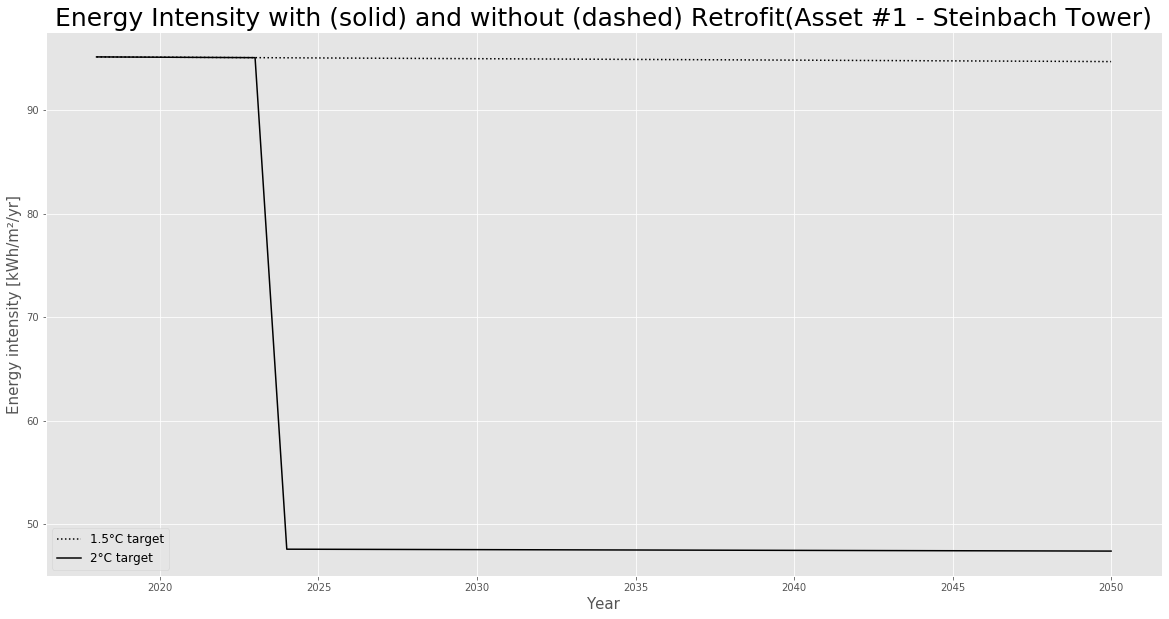

In [103]:
energy_intensity_RF(1)

# XI. Carbon intensity - Stranding diagram with / without retrofit

In [104]:
def stranding_diagram_RF(asset_num, target_temp):
    
    if target_temp == 1.5:
        target = FP.iloc[asset_num-1,:]
    else:
        target = HA.iloc[asset_num-1,:]
        
    #import MA as emission metric
    Climate_grid = MA
    climate_grid = Climate_grid.iloc[asset_num-1,:]
    Baseline = [climate_grid.iloc[0]]*len(climate_grid) #create baseline pandas series with same index as climate_grid
    baseline = pd.Series(Baseline, index = climate_grid.index) 
    with_RF = CRC.iloc[asset_num-1,:]
    wo_RF = MA.iloc[asset_num-1,:]

       #plot diagram
    plt.figure(figsize = (20,10))
    plt.plot(target, 'g', label = 'Decarbonisation target')
    plt.plot(wo_RF.iloc[[0]],'kD', markersize = 10, label = '2018 performance') 
    plt.plot(with_RF, 'k', label = 'Carbon intensity with retrofit')
    plt.plot(wo_RF, ':k', label = 'Carbon intensity without retrofit')

    #stranding year without retrofit
    stranding_wo = target - wo_RF
    if (stranding_wo < 0).any() :
        stranding_year = stranding_wo[stranding_wo < 0].index[0]
        plt.plot(wo_RF[[stranding_year]], 'ro', markersize = 20, label = 'Stranding without retrofit')

    #stranding year with retrofit
    stranding_with = target - with_RF
    if (stranding_with < 0).any() :
        stranding_year = stranding_with[stranding_with < 0].index[0]
        plt.plot(with_RF[[stranding_year]], 'go', markersize = 20, label = 'Stranding after retrofit')

    #Excess emissions
   # plt.fill_between(target.index, target, with_RF, where = (target < with_RF), color='C1', alpha=0.3, label = 'Excess emissions')
    plt.legend(loc = 'best', fontsize = 12)

    #set title and axis labels
    asset_name = input_E.iloc[asset_num-1,0]
    plt.title(f'Carbon intensity - Stranding diagram with (solid) and without (dashed) retrofit measures(Asset #{asset_num} - {asset_name})', fontsize = 25)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('GHG intensity [kgCO2e/m²/a]', fontsize = 15)
    plt.show()

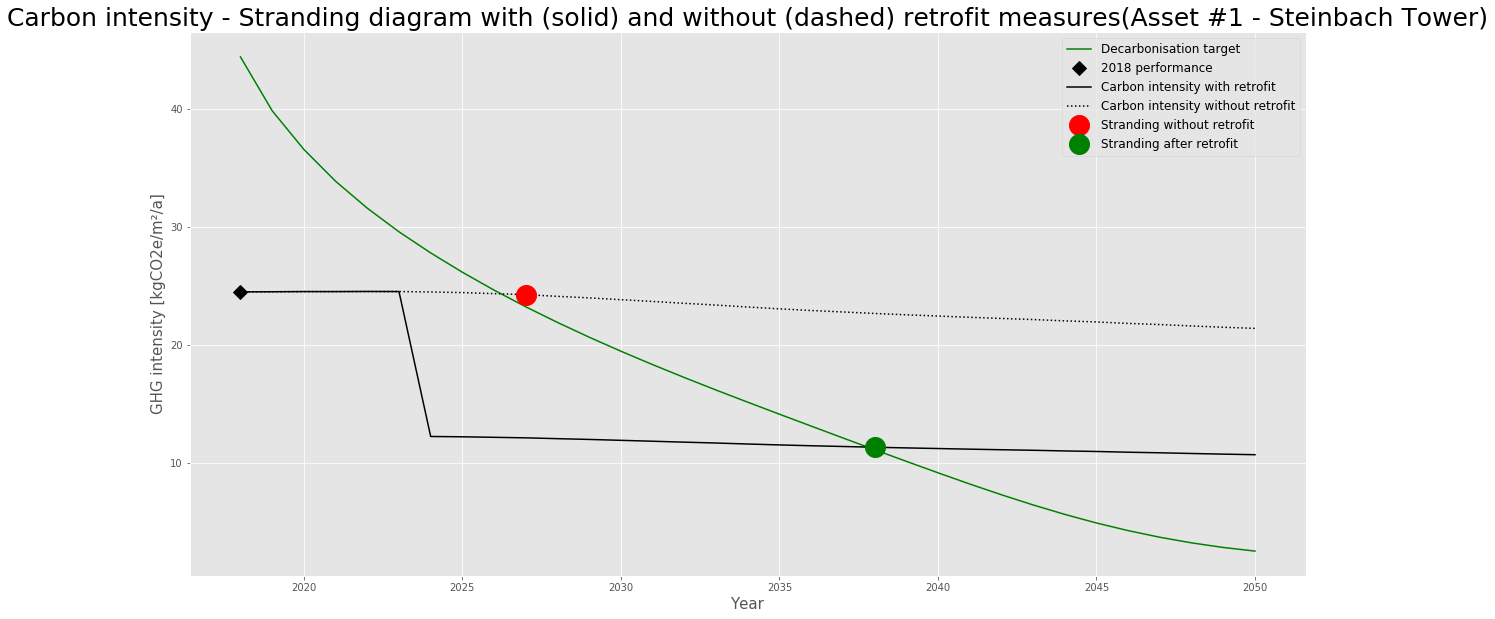

In [124]:
stranding_diagram_RF(1, 1.5)

# XI. Electricity Price

In [111]:
def electricity_price(asset_num, parameter):

    if parameter == 'electricity emissions factor':

        plt.figure(figsize = (20,10))
        plt.plot(factor.iloc[asset_num-1], 'b')
        plt.title('Electricity emissions factor [kgCO2e/m²]', fontsize = 25)
        plt.xlabel('Year', fontsize = 15)
        plt.show()

    elif parameter == 'electricity price':

        plt.figure(figsize = (20,10))
        plt.plot(electricity.iloc[asset_num-1], 'b')
        plt.title('Electricity price [€/kWh]', fontsize = 25)
        plt.xlabel('Year', fontsize = 15)
        plt.show()

    elif parameter == 'carbon price':

        plt.figure(figsize = (20,10))
        plt.plot(carbon.iloc[asset_num-1], 'b')
        plt.title('Carbon price [€/kgCO2e]', fontsize = 25)
        plt.xlabel('Year', fontsize = 15)
        plt.show()

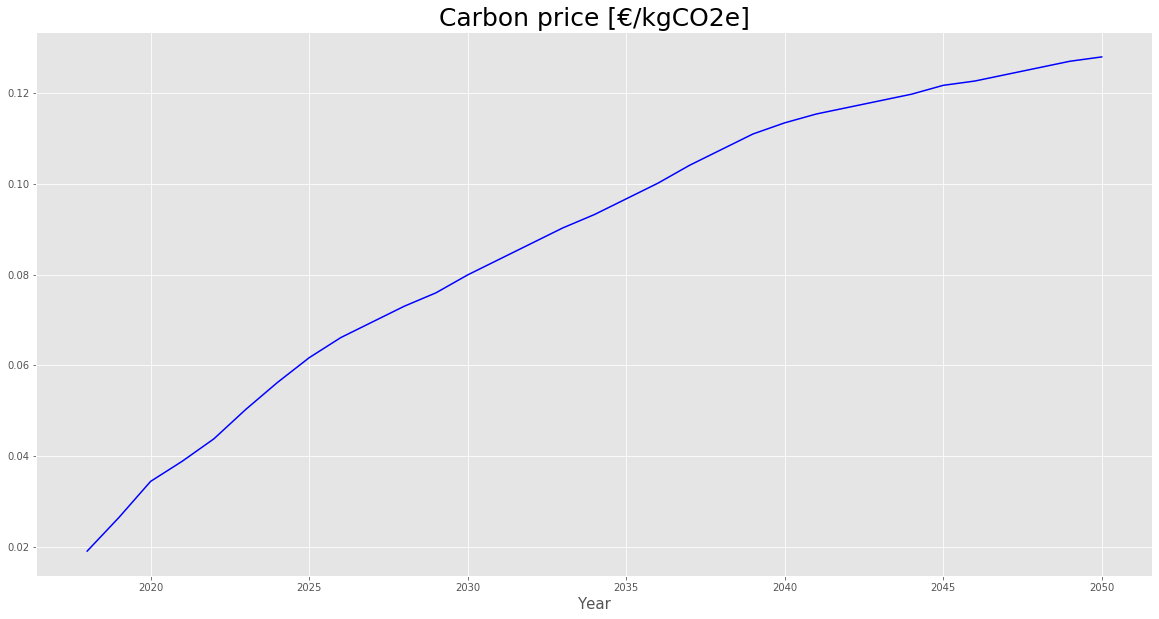

In [112]:
electricity_price(1, 'carbon price')

In [116]:
#emission factor
factor = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_G.iloc[i][0] == 'Default':
            factor.iloc[i][year] = A32.loc[AR.iloc[i]][year][0]
        else:
            if set_H.iloc[i][0] == 'Set 2018 value and annual rate of change':
                factor.iloc[i][year] = set_I.iloc[i][0]
            else:
                factor.iloc[i][year] = set_BI.iloc[i][0]

#electricity price
electricity = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        if set_Q.iloc[i][0] == 'Default':
            electricity.iloc[i][year] = AVH34.loc[AR.iloc[i]][year][0]
        else:
            if set_R.iloc[i][0] == 'Set 2018 value and annual rate of change':
                electricity.iloc[i][year] = set_S.iloc[i][0]*(set_T.iloc[i][0]+1)**i
            else:
                electricity.iloc[i][year] = set_CQ.iloc[i][0]

#carbon price
carbon = pd.DataFrame(columns = years, index=list(range(total_asset_num)))
for i in range(total_asset_num):
    for year in years:
        carbon.iloc[i][year] = asset_GS.iloc[i][year]/KP.iloc[i][year]